
Summary information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                2240 non-null   int64  
 1   Year_Birth        2240 non-null   int64  
 2   Education         2240 non-null   object 
 3   Marital_Status    2240 non-null   object 
 4   Income            2216 non-null   float64
 5   Kidhome           2240 non-null   int64  
 6   Teenhome          2240 non-null   int64  
 7   Dt_Customer       2240 non-null   object 
 8   Recency           2240 non-null   int64  
 9   MntWines          2240 non-null   int64  
 10  MntFruits         2240 non-null   int64  
 11  MntMeatProducts   2240 non-null   int64  
 12  MntFishProducts   2240 non-null   int64  
 13  MntSweetProducts  2240 non-null   int64  
 14  MntGoldProds      2240 non-null   int64  
dtypes: float64(1), int64(11), object(3)
memory usage: 26

/tmp/ipython-input-3139418856.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(int(df['Income'].mean()), inplace=True)


<Figure size 640x480 with 0 Axes>

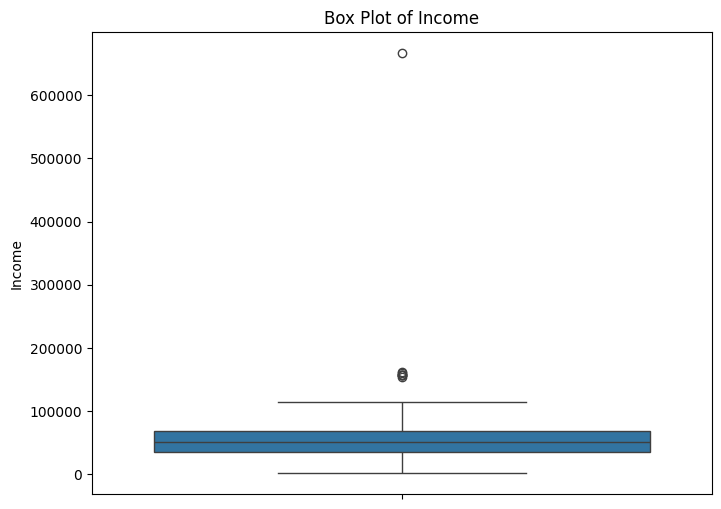

<Figure size 640x480 with 0 Axes>

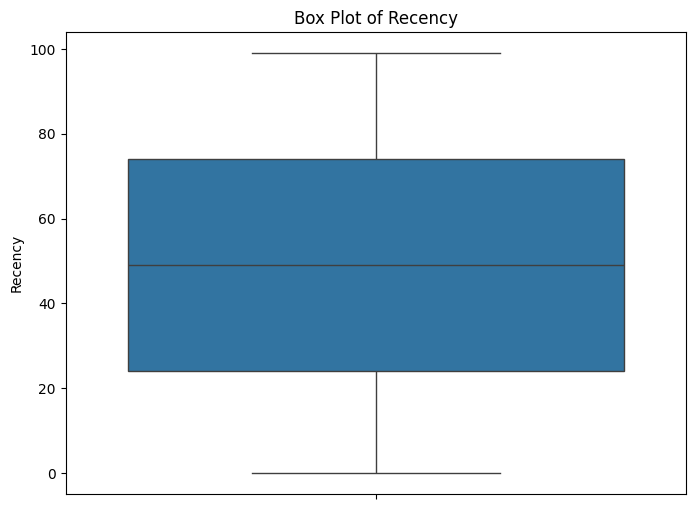

<Figure size 640x480 with 0 Axes>

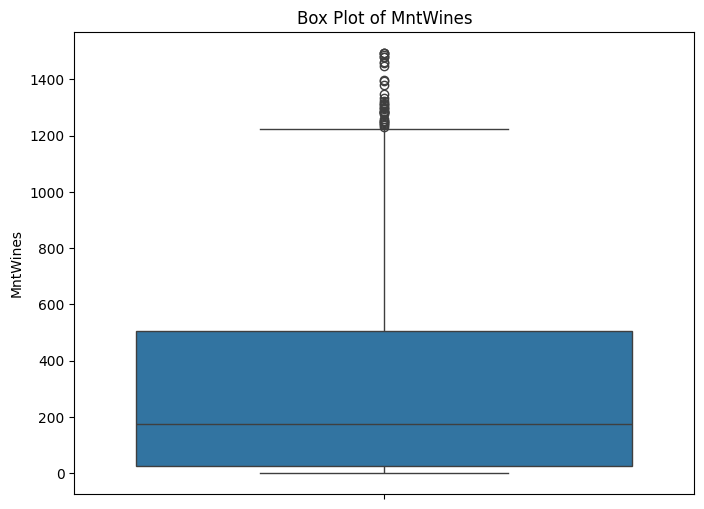

<Figure size 640x480 with 0 Axes>

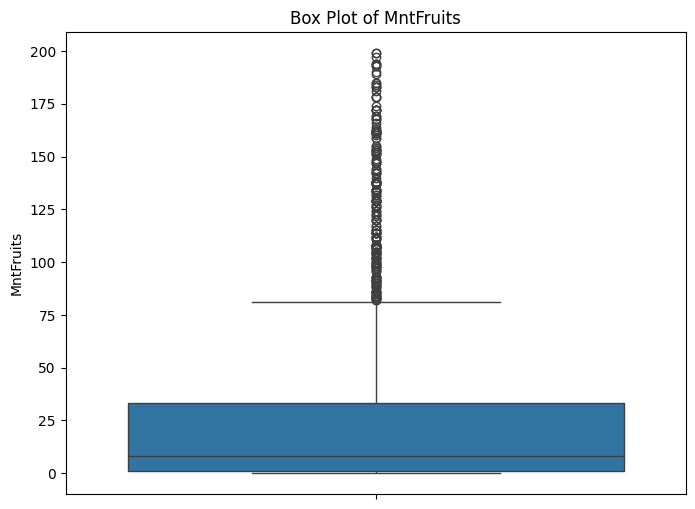

<Figure size 640x480 with 0 Axes>

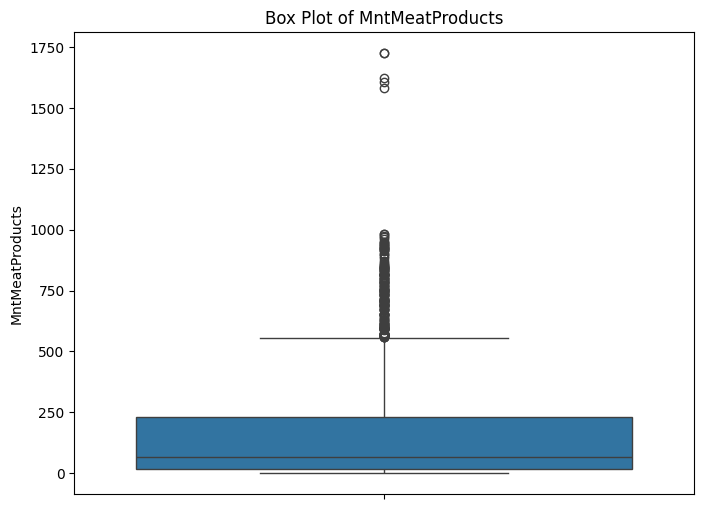

<Figure size 640x480 with 0 Axes>

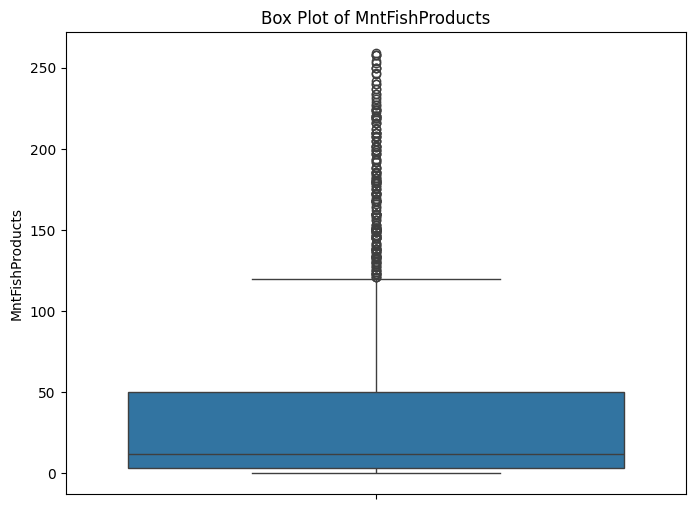

<Figure size 640x480 with 0 Axes>

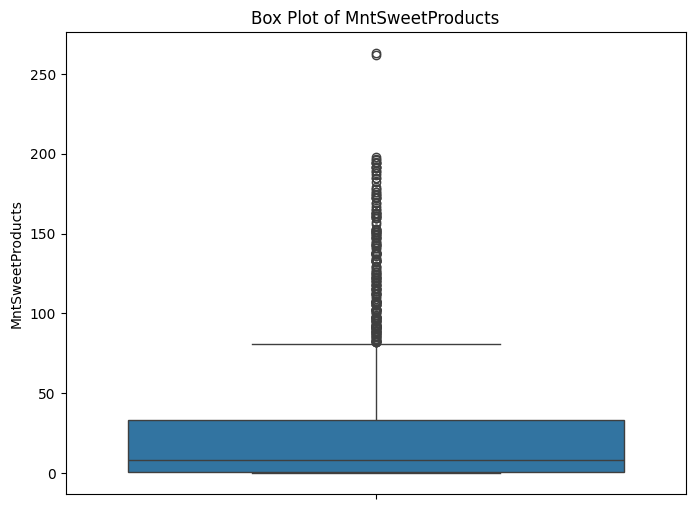

<Figure size 640x480 with 0 Axes>

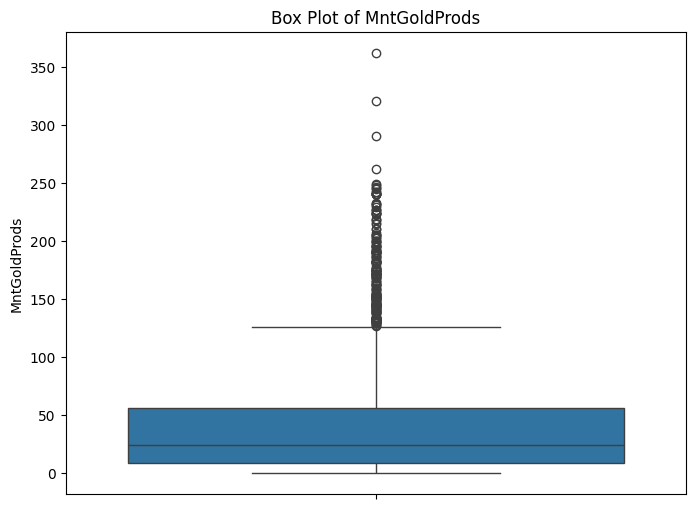


Dataset shape after outlier removal:  (1260, 15)

Cleaned dataset preview:
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
1  2174        1954  Graduation         Single  46344.0        1         1   
3  6182        1984  Graduation       Together  26646.0        1         0   
7  6177        1985         PhD        Married  33454.0        1         0   
8  4855        1974         PhD       Together  30351.0        1         0   
9  5899        1950         PhD       Together   5648.0        1         1   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
1  2014-08-03       38        11          1                6                2   
3  2014-10-02       26        11          4               20               10   
7  2013-08-05       32        76         10               56                3   
8  2013-06-06       19        14          0               24                3   
9  2014-03-13       68        28          0       

In [ ]:
# Importing libraries
import pandas, numpy, matplotlib.pyplot, seaborn

# Read dataset
df = pandas.read_excel("/content/NATA_EDA.xlsx")

# Summary of the dataset
print("\nSummary information of the dataset:")
print(df.info())

# Check for missing values
print(f"\nMissing values in each coloumn:")
print(df.isnull().sum())

# Fill missing values in the 'Income' column with the mean as an integer
df['Income'].fillna(int(df['Income'].mean()), inplace=True)

# Verify that there are no more missing values in the 'Income' column
print(f"\nMissing values in each coloumn:")
print(df.isnull().sum())

# Check for duplications
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

# If duplicates found run this code
# df_cleaned = df.drop_duplicates()
# df_cleaned

# Data type conversions (for Year_Birth and Dt_Customer)
df['Year_Birth'] = df['Year_Birth'].astype(int)
df['Dt_Customer'] = pandas.to_datetime(df['Dt_Customer'])

# Descriptive statistics
print("\nDescriptive statistics of the dataset:")
print(df.describe())

# Boxplot and Outliers
columns_to_plot = ["Income", "Recency", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

for column in columns_to_plot:
  # Create a new figure for each box plot
  matplotlib.pyplot.figure()
  matplotlib.pyplot.figure(figsize=(8, 6))
  seaborn.boxplot(data=df[column])
  matplotlib.pyplot.title(f'Box Plot of {column}')
  matplotlib.pyplot.show()

# Handling outliers
for column in columns_to_plot:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Filter out the outliers
  df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

print("\nDataset shape after outlier removal: ", df.shape)

# Final cleaned dataset
print("\nCleaned dataset preview:")
print(df.head())

# Convert 'Dt_Customer' to date-only format before saving to Excel
df['Dt_Customer'] = df['Dt_Customer'].dt.date

# To download clean data in excel file
df.to_excel("cleaned_NATA_EDA.xlsx", index=False)